# Laboratorio # 1 Statistical Learning

Importamos los paquetes.

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Fijamos un numero aleatorio.

In [90]:
np.random.seed(101) 
tf.set_random_seed(101) 

Cargamos archivos de datos

In [91]:
#CARGAR EL ARCHIVO
data = np.load('proyecto_training_data.npy')

Particionamos data en train y test.

In [ ]:
#PARTICIONAR DATA DE TRAIN Y TEST. 80% DE TRAIN, 20% TEST.
n = int(data.shape[0]*0.8)
train = data[:n]
test = data[n:]


Reseteamos la carpeta donde guardaremos nuestras graficas.

In [93]:
tf.reset_default_graph()

Grafica de las variables que se utilizaran para la prediccion.

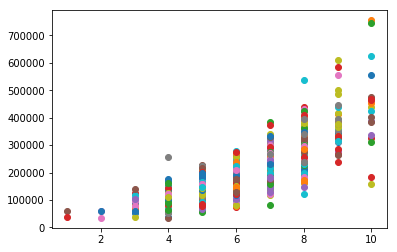

In [94]:
plt.plot(np.array([data[:,1]]),np.array([data[:,0]]), 'o')
plt.show()

Separamos los vectores en train y test. 

In [99]:

Ytr = train[:,0]
Xtr = train[:,1]
Yte = np.reshape(test[:,0], (test.shape[0], 1))
Xte = np.reshape(test[:,1], (test.shape[0], 1))

m = len(Xtr)

Iniciamos con el modelo

In [115]:
#Generamos el grafo. 
grafo = tf.Graph()
with grafo.as_default():  
    #Creamos todas las variables.
    X = tf.placeholder("float") 
    Y = tf.placeholder("float")
    W = tf.Variable(np.random.randn(), name = "W") 
    b = tf.Variable(np.random.randn(), name = "b")
    learning_rate = tf.placeholder("float")

    with tf.name_scope("Hipotesis"):
        ypred = tf.add(tf.multiply(X, W), b) 

    with tf.name_scope("Costo"):
        error = tf.reduce_sum(tf.pow(ypred-Y,2))/(2*m)


    #Summary cost
    summary_cost = tf.summary.scalar(name="Grafica_costo", tensor=error)

    learning_rate = 0.0001
    # Gradient Descent Optimizer 
    optimizador = tf.train.GradientDescentOptimizer(learning_rate).minimize(error) 

    # Variable para inicializar
    i = tf.global_variables_initializer() 

#Inicio del modelo.
def modelo(Xtr, Ytr, epoch, learning_rate):
    with tf.Session(graph = grafo) as sesion: 
        writer = tf.summary.FileWriter('./graphs/lr='+str(learning_rate), sesion.graph)
        sesion.run(i) 
        for epoch in range(epoch): 
            sesion.run(optimizador, feed_dict = {X : Xtr, Y : Ytr}) 


            #Mostrar resultados cada 2 iteraciones. 
            if (epoch + 1)% 2 == 0: 
                c = sesion.run(error, feed_dict = {X : Xtr, Y : Ytr}) 
                print("Epoch", (epoch + 1), ": Error =", c, "W =", sesion.run(W), "b =", sesion.run(b)) 

            summary = sesion.run(summary_cost, feed_dict={X: Xtr, Y: Ytr})
            writer.add_summary(summary, epoch)

        training_cost = sesion.run(error, feed_dict ={X: Xtr, Y: Ytr}) 
        peso = sesion.run(W) 
        bias = sesion.run(b) 
        writer.close()

In [117]:
#modelo(Xtr, Ytr, 100, 10)
#modelo(Xtr, Ytr, 100, 1)
#modelo(Xtr, Ytr, 100, 0.1)
#modelo(Xtr, Ytr, 100, 0.01)
#modelo(Xtr, Ytr, 100, 0.001)
#modelo(Xtr, Ytr, 100, 0.0001)

Learning rate 10

![](lr10.png)

## Learning rate 1

![](lr1.png)

## Learning rate 0.1

![](lr0p1.png)

## Learning rate 0.01

![](lr01.png)

## Learning rate 0.001

![](lr001.png)

## Learning rate 0.0001

![](lr0001.png)

## Todas las graficas 

![](Todoslr.png)

## Grafo 

![](Diagrama_Grafo.png)

Podemos conlcluir que a medida que el Learning rate sea menor, el modelo hara una mejor predicción de los datos, 
de lo contrario el error sera muy grande y la predicción sera erronea. 